In [173]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import os
# import PIL
import tensorflow as tf
import pickle5 as pickle
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob
import random
import datetime

In [174]:
lmodel = keras.models.load_model('saved_models/resnet50v2/')

In [175]:
valid = tf.data.experimental.load('savedata_valid')

In [176]:
y = valid.map(lambda x, y: y)

In [177]:
labels = y.as_numpy_iterator()

In [178]:
labels

In [179]:
label_n = np.array([], dtype=int)
for i in labels:
    if (i == [0, 0, 1]).all():
        label_n = np.append(label_n,2)
    elif (i == [0, 1,0]).all():
        label_n = np.append(label_n,1)
    elif (i == [1, 0, 0]).all():
        label_n = np.append(label_n,0)    
    # print(label_n)

In [180]:
pred=tf.nn.softmax(lmodel.predict(valid.batch(10)))

79/79 [==============================] - 7s 73ms/step


In [181]:
np.shape(pred.numpy())

(782, 3)

In [182]:
label_n

array([2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1,
       0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1,
       2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 2,
       2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0,
       2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1,
       0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1,
       0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 1, 1,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2,

In [184]:
label_n == np.argmax(pred.numpy(), axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [183]:
np.argmax(pred.numpy(), axis=1)

array([2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1,
       2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1,
       0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2,

In [185]:
import sklearn.metrics
print(sklearn.metrics.classification_report(label_n, np.argmax(pred.numpy(), axis=1), target_names=['coal','steel', 'other']))

              precision    recall  f1-score   support

        coal       0.95      0.92      0.94       197
       steel       0.90      0.91      0.91       189
       other       0.95      0.95      0.95       396

    accuracy                           0.94       782
   macro avg       0.93      0.93      0.93       782
weighted avg       0.94      0.94      0.94       782



In [193]:
print(np.round(sklearn.metrics.multilabel_confusion_matrix(label_n, np.argmax(pred.numpy(), axis=1) )/782,2))

[[[0.74 0.01]
  [0.02 0.23]]

 [[0.73 0.02]
  [0.02 0.22]]

 [[0.47 0.03]
  [0.02 0.48]]]


In [68]:
np.shape(label_n)

(791,)

In [115]:
x_size, y_size = 230,230
off=0

def load_features(name):
    decoded = name
    if os.path.exists(decoded):
        with open(decoded, 'rb') as f:
            file = pickle.load(f)
            label = tf.strings.split(tf.strings.split(name, '/')[-1], '\\')[-2]
            if label == 'coal':
                label = [1,0,0]
            elif label == 'steel':
                label = [0,1,0]
            else: label = [0,0,1]
            if (file["B02"].shape[1]<230 or file["B02"].shape[2]<230): 
                print("oh oh, downloaded patch too smol:", decoded)
            B02, B03, B04, B08 = file['B02'][0][0:x_size,0:y_size], file['B03'][0][0:x_size,0:y_size], file['B04'][0][0:x_size,0:y_size],file['B08'][0][0:x_size,0:y_size]
            B02, B03, B04, B08 = B02[off:-off,off:-off], B03[off:-off,off:-off], B04[off:-off,off:-off], B08[off:-off,off:-off] 
            features = np.array([ B02, B03, B04, B08]).transpose(1,2,0)
            # features = np.expand_dims(features, axis=0)
            return features, label
            # I have commented the line below but this should return
            # the features and the label in a one hot vector
            # return file['features'], file['targets']
    else:
        print("Something went wrong!")
        exit(-1)
        
def data_loader(filename):
    features, labels = tf.numpy_function(load_features, [filename], [tf.double, tf.int32])
    # features.set_shape((None, 242,242,4))
    # labels.set_shape(( 1))
    return features, labels

path = 'E:/Users/sentinel_industry/downloaded_aois/coal/'

pkl_files = glob.glob((path+"*.pickle"))
path_steel = 'E:/Users/sentinel_industry/downloaded_aois/steel/'
pkl_files_steel = glob.glob((path_steel+"*.pickle"))
path_steel_no_ind = 'E:/Users/sentinel_industry/downloaded_aois/steel/no_ind/'
pkl_files_steel_no_ind = glob.glob((path_steel_no_ind+"*.pickle"))
path_coal_no_ind = 'E:/Users/sentinel_industry/downloaded_aois/coal/no_ind/'
pkl_files_coal_no_ind = glob.glob((path_coal_no_ind+"*.pickle"))
pkl_files = pkl_files + pkl_files_steel + pkl_files_steel_no_ind + pkl_files_coal_no_ind
random.Random(42).shuffle(pkl_files)
dataset_len=len(pkl_files)

train_size = int(np.floor(0.8 * dataset_len))
valid_size = int(np.floor(0.1 * dataset_len))
test_size = int(np.floor(0.1 * dataset_len))
valid_files = pkl_files[train_size:train_size+valid_size]

In [76]:
np.argmax(pred.numpy(), axis=1)

array([1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2,
       2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2,
       2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0,
       0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 1,
       1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 1,
       1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2,

In [116]:
x_s = 230-2*off
y_s = 230-2*off
in_seed = 42
resize_rescale_augment = tf.keras.Sequential([
    layers.RandomRotation(0.2, seed=in_seed, input_shape=(x_s,y_s,4)),  # here, maybe try larger values
    layers.CenterCrop(140,140, ),
    layers.RandomCrop(120,120, seed=in_seed, ),  # to be changed with centercrop for data augmentation/ use centre first, then random?
    
    # layers.Rescaling(1./10000),#,input_shape=(240,240,4)), # I think the data is scaled to 10000
    layers.RandomFlip("horizontal_and_vertical", seed=in_seed), 
    # norm_layer,
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

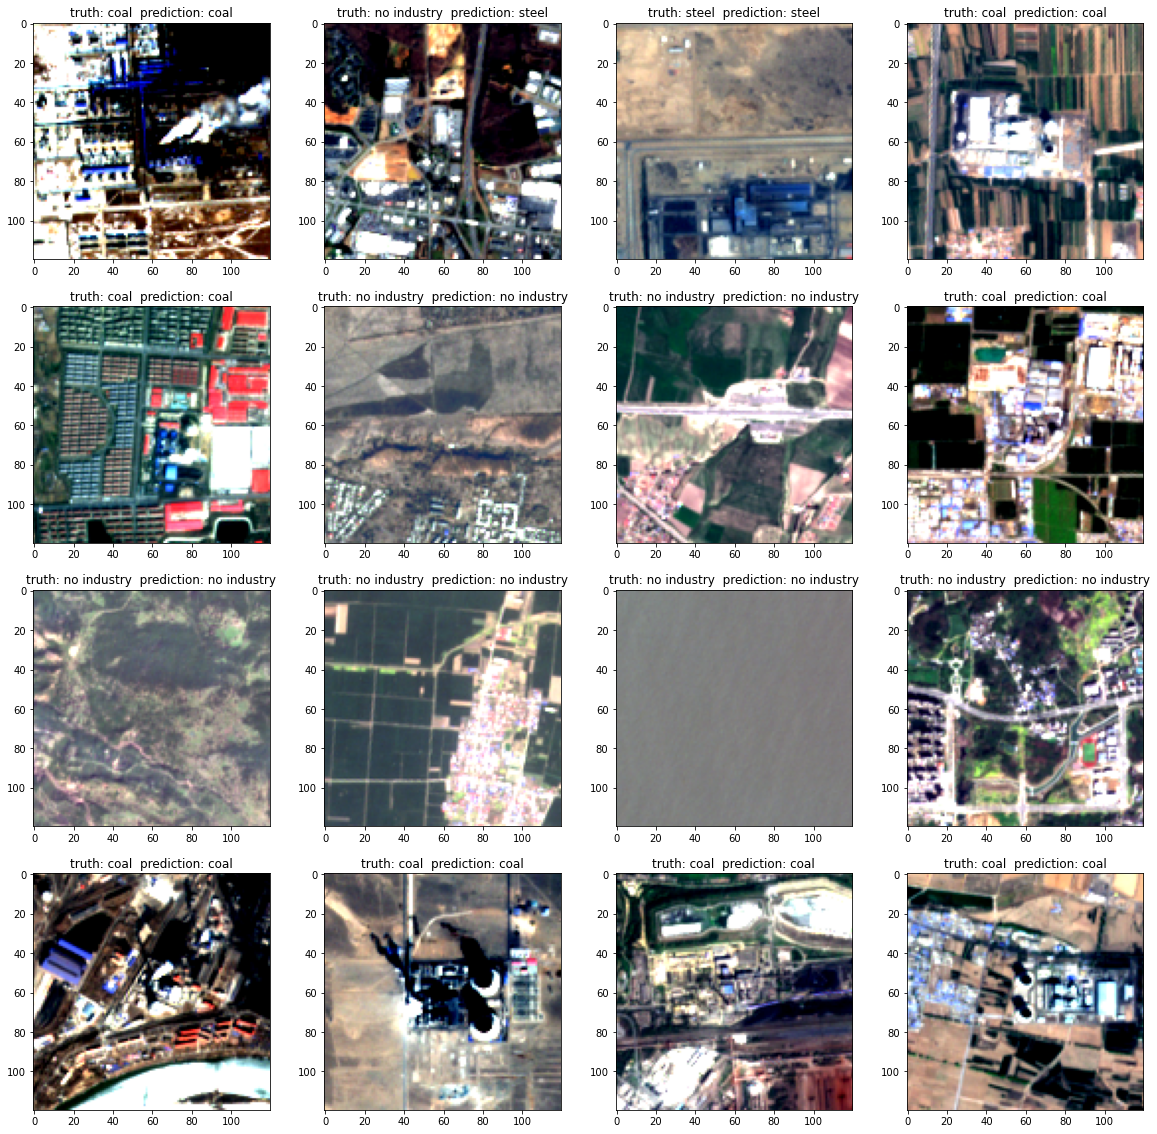

In [153]:
def convert_onehot(next_element):
    if (next_element == np.array([0, 0, 1])).all(): return 'no industry'
    elif (next_element == np.array([0, 1, 0])).all(): return 'steel'
    elif (next_element == np.array([1, 0, 0])).all(): return 'coal'
    else: return 'not valid'
def convert_label(next_element):
    if next_element == 2 : return 'no industry'
    elif next_element == 1 : return 'steel'
    elif next_element == 0 : return 'coal'
    else: return 'not valid'

plt.figure(figsize=(20, 20))

for i in range( 48,64):
    ax = plt.subplot(4, 4, i + 1 -48)
    loaded = load_features(valid_files[i]) 
    # print(loaded[1])
    # im = loaded[0]
    # plt.imshow(np.flip(im[:,:,0:3]/5000, axis=2))
    for da in valid.skip(i).take(1).as_numpy_iterator():
    # print(i[0].shape)
        im = resize_rescale_augment(tf.expand_dims(
    da[0], 0, name=None))
        plt.imshow((np.flip(im[0,:,:,0:3]-im[0,:,:,0:3].numpy().mean(axis=0).mean(axis=0)*1.+0.5,  axis=2)))
    plt.title('truth: ' + convert_label(label_n[i])+'  ' + 'prediction: '+convert_label(np.argmax(pred.numpy(), axis=1)[i]))
plt.savefig('figures/prediction_example', dpi=300, format='svg')

In [157]:
wrong_pred = np.where((label_n == np.argmax(pred.numpy(), axis=1)) == False)

In [162]:
wrong_pred

(array([  3,   7,  12,  34,  38,  49,  78,  91, 107, 127, 131, 138, 152,
        153, 165, 197, 199, 204, 212, 228, 258, 265, 269, 274, 334, 359,
        363, 389, 401, 438, 470, 477, 480, 506, 511, 516, 517, 523, 525,
        550, 561, 562, 563, 572, 599, 601, 602, 606, 618, 647, 650, 651,
        663, 688, 689, 692, 693, 699, 702, 714, 728, 729, 738, 740, 743,
        744, 750, 757, 771, 778], dtype=int64),)

In [168]:
np.round(pred.numpy()[i].max(),2)

0.84

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

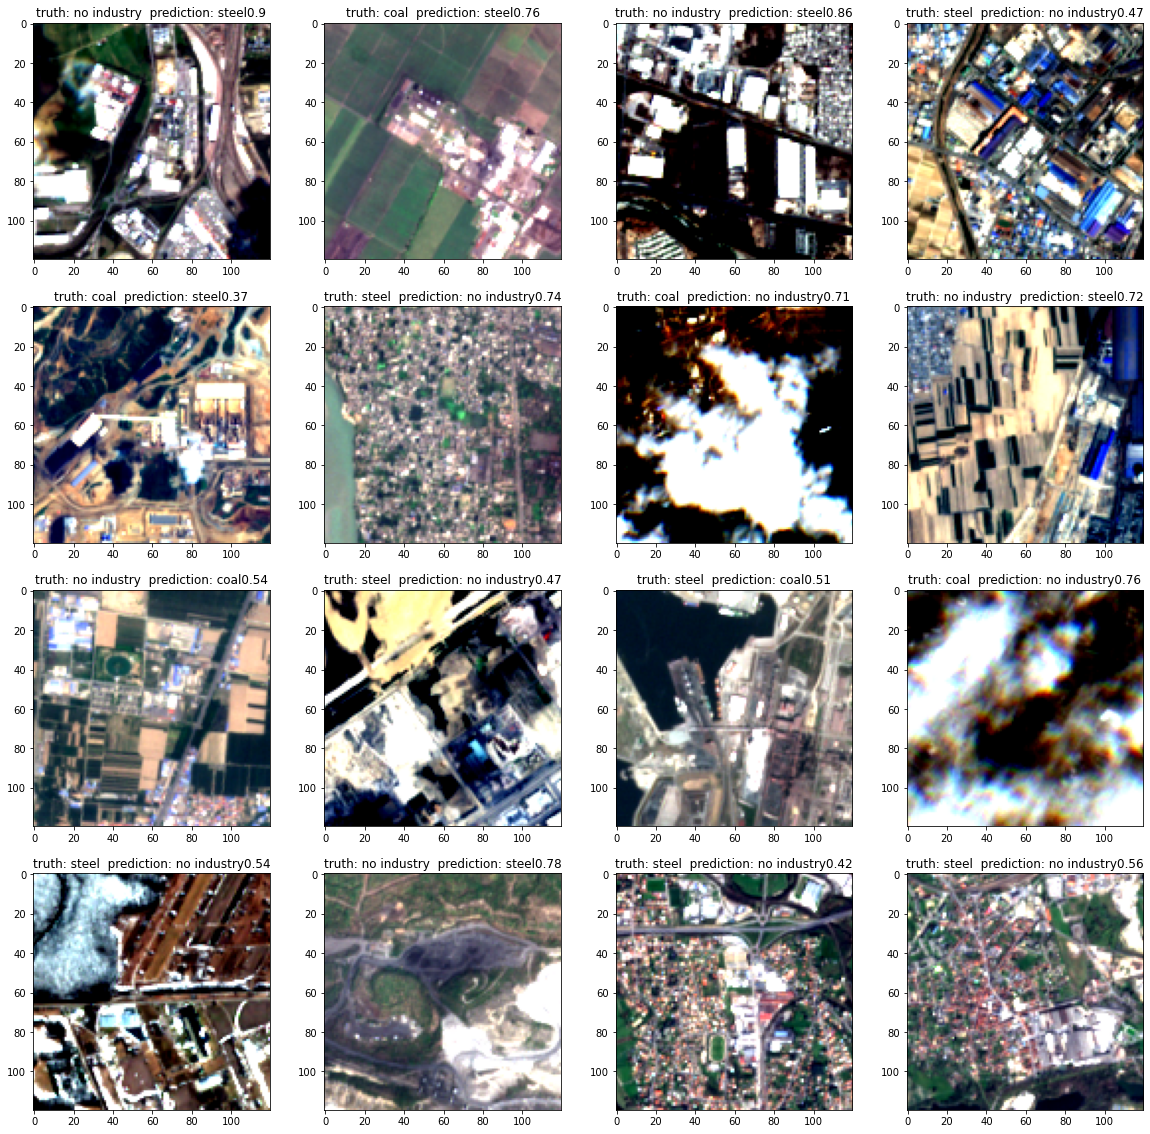

In [172]:
plt.figure(figsize=(20, 20))

for j,i in enumerate(wrong_pred[0][32:48]):
    ax = plt.subplot(4, 4, j + 1 )
    loaded = load_features(valid_files[i]) 
    # print(loaded[1])
    # im = loaded[0]
    # plt.imshow(np.flip(im[:,:,0:3]/5000, axis=2))
    for da in valid.skip(i).take(1).as_numpy_iterator():
    # print(i[0].shape)
        im = resize_rescale_augment(tf.expand_dims(
    da[0], 0, name=None))
        plt.imshow((np.flip(im[0,:,:,0:3]-im[0,:,:,0:3].numpy().mean(axis=0).mean(axis=0)*1.+0.5,  axis=2)))
    plt.title('truth: ' + convert_label(label_n[i])+'  ' + 'prediction: '+convert_label(np.argmax(pred.numpy(), axis=1)[i])+str(np.round(pred.numpy()[i].max(),2)))
# plt.savefig('figures/prediction_example', dpi=300, format='svg')

In [ ]:
def convert_onehot(next_element):
    if (next_element == np.array([0, 0, 1])).all(): return 'no industry'
    elif (next_element == np.array([0, 1, 0])).all(): return 'steel'
    elif (next_element == np.array([1, 0, 0])).all(): return 'coal'
    else: return 'not valid'
def convert_label(next_element):
    if next_element == 2 : return 'no industry'
    elif next_element == 1 : return 'steel'
    elif next_element == 0 : return 'coal'
    else: return 'not valid'

plt.figure(figsize=(20, 20))

for i in range( 48,64):
    ax = plt.subplot(4, 4, i + 1 -48)
    loaded = load_features(valid_files[i]) 
    # print(loaded[1])
    # im = loaded[0]
    # plt.imshow(np.flip(im[:,:,0:3]/5000, axis=2))
    for da in valid.skip(i).take(1).as_numpy_iterator():
    # print(i[0].shape)
        im = resize_rescale_augment(tf.expand_dims(
    da[0], 0, name=None))
        plt.imshow((np.flip(im[0,:,:,0:3]-im[0,:,:,0:3].numpy().mean(axis=0).mean(axis=0)*1.+0.5,  axis=2)))
    plt.title('truth: ' + convert_label(label_n[i])+'  ' + 'prediction: '+convert_label(np.argmax(pred.numpy(), axis=1)[i]))
plt.savefig('figures/prediction_example', dpi=300, format='svg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0, 0, 1]
[1, 0, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[1, 0, 0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[1, 0, 0]


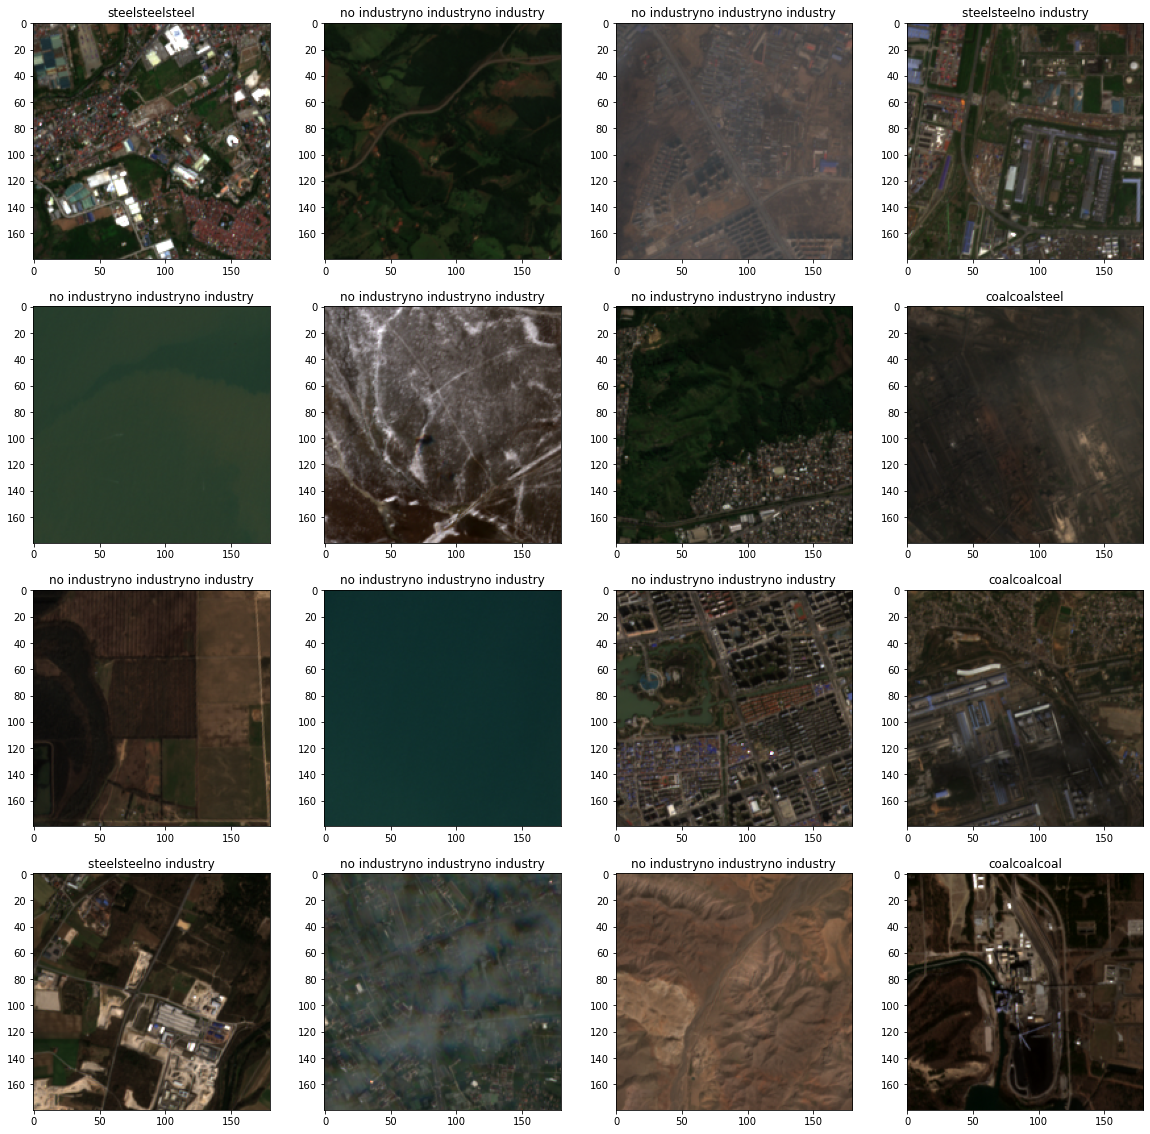

In [106]:
def convert_onehot(next_element):
    if (next_element == np.array([0, 0, 1])).all(): return 'no industry'
    elif (next_element == np.array([0, 1, 0])).all(): return 'steel'
    elif (next_element == np.array([1, 0, 0])).all(): return 'coal'
    else: return 'not valid'
def convert_label(next_element):
    if next_element == 2 : return 'no industry'
    elif next_element == 1 : return 'steel'
    elif next_element == 0 : return 'coal'
    else: return 'not valid'

plt.figure(figsize=(20, 20))

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    loaded = load_features(valid_files[i]) 
    print(loaded[1])
    im = loaded[0]
    plt.imshow(np.flip(im[:,:,0:3]/5000, axis=2))
    plt.title(convert_onehot(loaded[1]) + convert_label(label_n[i]) +convert_label(np.argmax(pred.numpy(), axis=1)[i]))

In [46]:
im.shape

(230, 230, 4)

In [40]:
im

array([[[ 755,  982, 1426, 2580],
        [ 808, 1070, 1394, 2746],
        [1124, 1404, 1456, 3040],
        ...,
        [ 674,  968, 1078, 2448],
        [ 786,  908, 1460, 1936],
        [1278, 1432, 1842, 2154]],

       [[ 847, 1076, 1480, 2634],
        [ 846, 1122, 1470, 2702],
        [ 982, 1320, 1512, 2902],
        ...,
        [ 708, 1007, 1190, 2574],
        [1004,  973, 1001, 1706],
        [1490, 1356, 1760, 2288]],

       [[ 907, 1132, 1556, 2728],
        [ 907, 1130, 1572, 2752],
        [ 973, 1316, 1622, 2876],
        ...,
        [ 879, 1234, 1400, 2204],
        [1200, 1024, 1130, 1986],
        [1472, 1020, 1272, 2406]],

       ...,

       [[ 438,  858,  656, 3164],
        [ 428,  703,  625, 2962],
        [ 354,  721,  639, 2846],
        ...,
        [ 676,  946, 1154, 3318],
        [ 827, 1206, 1190, 3312],
        [1138, 1516, 1572, 3112]],

       [[ 424,  777,  660, 2750],
        [ 514,  798,  672, 2524],
        [ 455,  768,  741, 2456],
        .

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


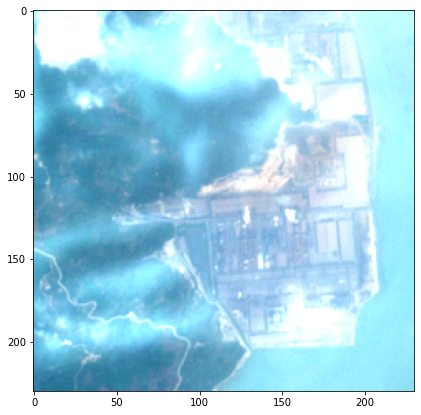

In [422]:
plt.figure(figsize=(7,7))
im = load_features(valid_files[index])[0]
plt.imshow((np.flip(im[:,:,0:3]+np.abs(im.mean())*0+0.5, axis=2)))


In [397]:
valid_files[index]

'E:/Users/sentinel_industry/downloaded_aois/steel/no_ind\\GASTDEU0005.pickle'

In [398]:
discard_list.append(valid_files[index])

In [424]:
np.save('discard2half', np.array( discard_list))

In [425]:
for file in discard_list:
    os.remove(file)

In [ ]:
# plt.figure(figsize=(7,7))
# for i in valid.skip(index).take(1).as_numpy_iterator():
#     print(i[0].shape)
#     im = i[0]
#     plt.imshow((np.flip(im[:,:,0:3]+np.abs(im.mean())*2, axis=2)))